In [1]:
import sys, os
from pathlib import Path

BASE_DIR = Path(os.path.dirname(os.path.dirname(os.getcwd())))
print(BASE_DIR)
sys.path.append(str(BASE_DIR))

/home/sahel/personal/university/NLP/project/MultiModalEmotionRecognition


In [2]:
from face_extractor import FaceEmbeddingExtractor
from face_detection import FaceDetection
from face_alignment import FaceAlignment
from face_normalizer import FaceNormalizer
from face_emotion_recognizer import FaceEmotionRecognizer
import cv2
import matplotlib.pyplot as plt

fd = FaceDetection("MTCNN", minimum_confidence=0.95)
fa = FaceAlignment()
fn = FaceNormalizer()
model_name = "enet_b0_8_best_afew"
# model_name='enet_b0_8_best_vgaf'
# model_name='enet_b0_8_va_mtl'
# model_name='enet_b2_8'
fer = FaceEmotionRecognizer(model_name=model_name, device="cpu")

fre = (
    FaceEmbeddingExtractor()
    .set_face_detection_model(fd)
    .set_face_alignment_model(fa)
    .set_face_normalizer_model(fn)
    .set_face_emotion_recognition_model(fer)
)

2022-08-25 10:16:45.723721: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/sahel/personal/university/NLP/project/MultiModalEmotionRecognition/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-08-25 10:16:48.131899: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 10:16:48.178290: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot op

/home/sahel/.hsemotions/enet_b0_8_best_afew.pt Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [3]:
im = cv2.imread("/home/sahel/personal/university/NLP/project/MultiModalEmotionRecognition/data/images/test/0.jpg")[:, :, ::-1]
predictions = fre.get_labels([im])

1/1 [==============================] - 0s 68ms/step


In [4]:
predictions

['Fear']

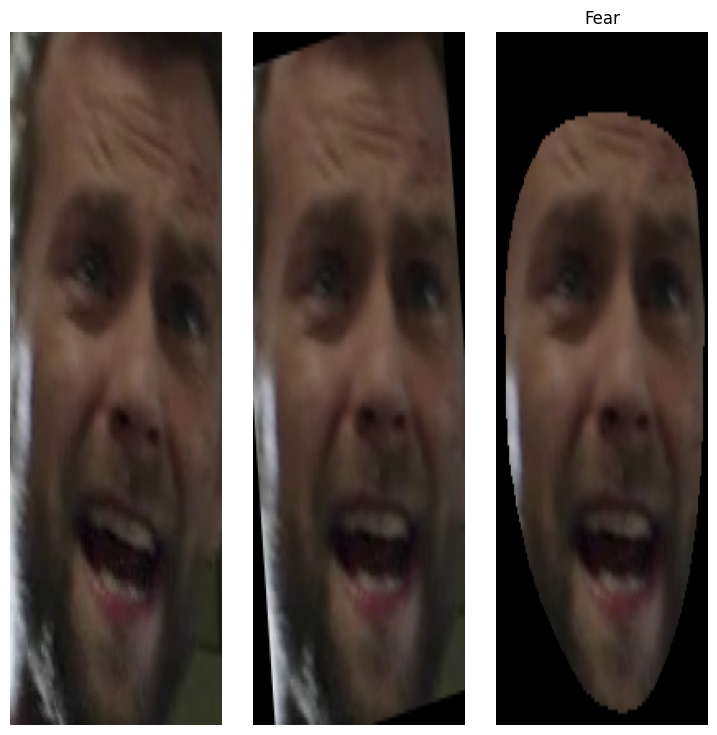

In [12]:
fig = plt.figure(figsize=(9, 9))

n = len(fre.faces)
for index in range(n):
    plt.subplot(n, 3, 3 * index + 1)
    plt.axis("off")
    plt.imshow(fre.faces[index], aspect="auto")

    plt.subplot(n, 3, 3 * index + 2)
    plt.axis("off")
    plt.imshow(fre.rotated_faces[index], aspect="auto")

    plt.subplot(n, 3, 3 * index + 3)
    plt.axis("off")
    plt.imshow(fre.normalized_rotated_faces[index], aspect="auto")

    plt.title(f"{predictions[index]}")

plt.subplots_adjust(hspace=0.15, wspace=0.15)
plt.show()